<a href="https://colab.research.google.com/github/ArvindRe/GuidedCapstone/blob/master/Notebook_steptwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone Step 2 Data Wrangling


Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.  



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

First, you'll load the needed packages and modules into Python. Then you'll load the data into a pandas dataframe for ease of use. Run the cell below to get started.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now you need to prepare to load the csv file of your data. You may need to change your path to the location where you saved the csv file on your local machine or you need to save both the csv and the notebook to your working project directory. 
Start by printing the current directory. Hint: you can do this by running the command `os.getcwd()`. 

**<font color='teal'> Print the current working directory </font>**

In [2]:
os.getcwd()

'/content'

**<font color='teal'> Print the files in your current directory to make sure the 'updated_ski_data.csv' is present. </font>**


Hint: if you're not sure on how to do this, this [link](https://www.geeksforgeeks.org/python-os-listdir-method/) can offer guidance.


In [3]:

dir_list = os.listdir(os.getcwd()) 
  
print("Files and directories in '", os.getcwd(), "' :")  
  
# print the list 
print(dir_list) 

Files and directories in ' /content ' :
['.config', 'updated_ski_data (1) (3).csv', 'updated_ski_data (1) (2).csv', 'updated_ski_data (1).csv', 'updated_ski_data (1) (1).csv', 'step2_output.csv', 'sample_data']


<font color='teal'> **If you need to change your working directory by defining the path in the next cell make sure to uncomment the code before running the cell. If your path is fine, go on to the Load the data step.**</font>

In [0]:
path="/content"
os.chdir(path) 

### Load the data from the csv file
Now you're ready to read your data into a pandas dataframe. In this exercise, this will complete the data collection step as all the data you need for your project are contained in this one csv file.
*Double check your path is correct, and that between the `file` name and the `path`, you have the full location of your `updated_ski_data.csv`

<font color='teal'> **Load the data into a pandas dataframe and print the first five rows of the dataframe.**</font>

Since we're using COlab, we have a few extra steps before we simply use pd.read_csv:

In [5]:
from google.colab import files
uploaded=files.upload()

Saving updated_ski_data (1).csv to updated_ski_data (1) (4).csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "updated_ski_data (1).csv" with length 35441 bytes


In [0]:
import io
file=pd.read_csv(io.StringIO(uploaded['updated_ski_data (1).csv'].decode('utf-8')))

In [8]:
file.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Data Organization

Data organization for this guided capstone involves creating a basic project folder structure. As you read in the Medium article introducing the data wrangling step, this step is often completed using Github or a module such as cookiecutter. Now that you have your data and your notebook pointing to your working project directory, let's start by printing the current file location. You'll then create a few subfolders to keep your project organized.

<font color='teal'> **Finish the statement below by assigning the path variable.**</font>

In [0]:
path = '/content'

In [10]:
print ("The current working directory is %s" % path)

The current working directory is /content


### Create subfolders in your project directory

Now, create some subfolders inside your project folder.

<font color='teal'> **Create a subfolder called `data`.**</font>

In [0]:
#os.mkdir('data')

<font color='teal'> **Create a folder for the data visualizations you will create in future steps called `figures`.**</font>

In [12]:
print(os.listdir(os.getcwd()))

['.config', 'updated_ski_data (1) (4).csv', 'updated_ski_data (1) (3).csv', 'updated_ski_data (1) (2).csv', 'updated_ski_data (1).csv', 'updated_ski_data (1) (1).csv', 'step2_output.csv', 'sample_data']


In [0]:
#os.mkdir('figures')

<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [0]:
#os.mkdir('models')

<font color='teal'> **Print the contents of your project folder to confirm you created the additional folders in your directory.**</font>

In [15]:
print(os.listdir(os.getcwd()))

['.config', 'updated_ski_data (1) (4).csv', 'updated_ski_data (1) (3).csv', 'updated_ski_data (1) (2).csv', 'updated_ski_data (1).csv', 'updated_ski_data (1) (1).csv', 'step2_output.csv', 'sample_data']


## Data Definition
In this step, you'll review column names, data types, and null values.

### Column Names 
<font color='teal'> **Print the columns names of the entire dataframe**</font>

In [16]:
file.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

### Data Types 
Review which columns are integer, float, categorical, or dates. Make sure the data type is loaded properly in the dataframe. 

<font color='teal'> **Using the `df.dtypes` function, print the variable names and associated datatypes.**</font>

In [17]:
file.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

<font color='teal'> **The `df.info()` function also prints the count of non-null values per column. Use this function to review the column names, null value counts and data types of your data frame.**</font>

In [18]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

Some of these column names are easy to understand but others are not as clear. You have a metadata file with information about each column to help you understand what the column names refer to. Let's review the metadata table below for more information about each column.

Descriptions of Columns

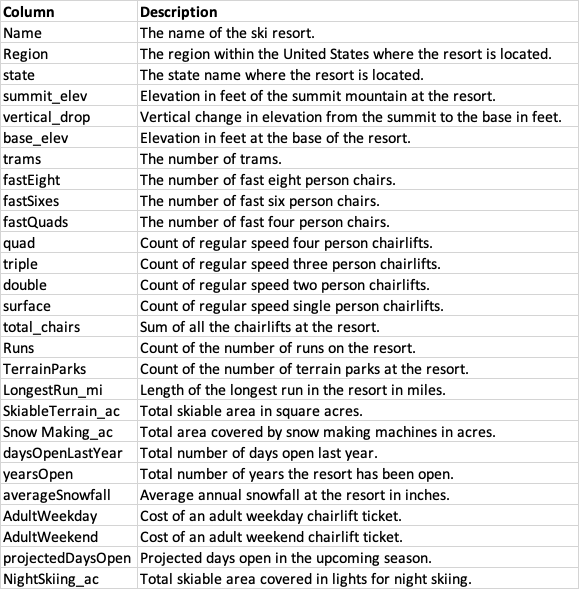

There are some null or missing values you'll need to mitgate in a later step. However, let's look at the counts of unique values or codes per column first.

### Count of unique values or codes
<font color='teal'> **Print the count of unique values for every column, regardless of data type.**</font>

In [19]:
for col in list(file):
    print(col, end='\t')
    print(file[col].nunique())

Name	329
Region	38
state	35
summit_elev	266
vertical_drop	193
base_elev	244
trams	5
fastEight	2
fastSixes	7
fastQuads	14
quad	7
triple	9
double	10
surface	12
total_chairs	31
Runs	110
TerrainParks	11
LongestRun_mi	42
SkiableTerrain_ac	193
Snow Making_ac	143
daysOpenLastYear	111
yearsOpen	72
averageSnowfall	107
AdultWeekday	83
AdultWeekend	81
projectedDaysOpen	90
NightSkiing_ac	78


<font color='teal'> **Print the percent of unique values per column. Use the `df.nunique` and the size of the dataframe to calculate the percentages.**</font>

In [20]:
for col in list(file):
    print(col, end='\t')
    print((file[col].nunique()/file[col].count())*100)

Name	99.69696969696969
Region	11.515151515151516
state	10.606060606060606
summit_elev	80.60606060606061
vertical_drop	58.484848484848484
base_elev	73.93939393939394
trams	1.5151515151515151
fastEight	1.2195121951219512
fastSixes	2.1212121212121215
fastQuads	4.242424242424243
quad	2.1212121212121215
triple	2.727272727272727
double	3.0303030303030303
surface	3.6363636363636362
total_chairs	9.393939393939393
Runs	33.74233128834356
TerrainParks	3.942652329749104
LongestRun_mi	12.923076923076923
SkiableTerrain_ac	59.021406727828754
Snow Making_ac	50.352112676056336
daysOpenLastYear	39.784946236559136
yearsOpen	21.88449848024316
averageSnowfall	33.860759493670884
AdultWeekday	30.07246376811594
AdultWeekend	29.03225806451613
projectedDaysOpen	31.802120141342755
NightSkiing_ac	41.711229946524064


When working with categorical columns, it's really helpful to know what the unique codes are. <font color='teal'> **For example, if you look at the `Region` or `state` column, youcan print out the different states in the dataframe.**</font>

Hint: you can use the `value_counts()` method for this. 

Setting the Name column as index:

In [21]:
file=file.set_index('Name')
file.head()

,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [22]:
#file['Region'].value_counts()
#file['State'].value_counts()
dfo=file.select_dtypes(include=['object']) # select object type columns
file = pd.concat([file.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
file.head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Region_Alaska,Region_Arizona,Region_Colorado,Region_Connecticut,Region_Idaho,Region_Illinois,Region_Indiana,Region_Iowa,Region_Maine,Region_Maryland,Region_Massachusetts,Region_Michigan,Region_Minnesota,Region_Missouri,Region_Montana,Region_Mt. Hood,...,Region_Virginia,Region_Washington,Region_West Virginia,Region_Wisconsin,Region_Wyoming,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sunrise Park Resort,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Range of values per column

<font color='teal'>**Print the range of values using the aggregate function.**</font>

Hint: you can do this in a variety of ways, but one way is using the `agg()` dataframe method. You can pass this the `[min, max]` parameter and then call `.T` on the result to transpose it. 

In [23]:
df=file.agg(['max', 'min']).T
df

,max,min
summit_elev,13487.0,315.0
vertical_drop,4425.0,60.0
base_elev,10800.0,70.0
trams,4.0,0.0
fastEight,1.0,0.0
...,...,...
state_Virginia,1.0,0.0
state_Washington,1.0,0.0
state_West Virginia,1.0,0.0
state_Wisconsin,1.0,0.0


<font color='teal'> **Review the numeric dataset's summary statistics.**</font>

In [24]:
file.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Region_Alaska,Region_Arizona,Region_Colorado,Region_Connecticut,Region_Idaho,Region_Illinois,Region_Indiana,Region_Iowa,Region_Maine,Region_Maryland,Region_Massachusetts,Region_Michigan,Region_Minnesota,Region_Missouri,Region_Montana,Region_Mt. Hood,...,Region_Virginia,Region_Washington,Region_West Virginia,Region_Wisconsin,Region_Wyoming,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
count,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,326.000000,279.000000,325.000000,327.000000,284.000000,279.000000,329.000000,316.000000,276.000000,279.000000,283.000000,187.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,0.933333,1.50000,1.833333,2.621212,8.266667,48.214724,2.820789,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722,0.009091,0.006061,0.066667,0.015152,0.036364,0.012121,0.006061,0.009091,0.027273,0.003030,0.033333,0.087879,0.042424,0.006061,0.036364,0.012121,...,0.012121,0.030303,0.012121,0.048485,0.024242,0.009091,0.006061,0.063636,0.066667,0.015152,0.036364,0.012121,0.006061,0.009091,0.027273,0.003030,0.033333,0.087879,0.042424,0.006061,0.036364,0.012121,0.048485,0.006061,0.027273,0.100000,0.018182,0.015152,0.030303,0.057576,0.003030,0.006061,0.003030,0.039394,0.045455,0.012121,0.030303,0.012121,0.048485,0.024242
std,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,1.312245,1.61913,1.815028,2.059636,5.798683,46.364077,2.008113,1.156171,1816.167441,261.336125,35.063251,109.429928,136.356842,26.140126,24.554584,31.045963,105.169620,0.095056,0.077731,0.249823,0.122341,0.187478,0.109593,0.077731,0.095056,0.163124,0.055048,0.179778,0.283548,0.201861,0.077731,0.187478,0.109593,...,0.109593,0.171680,0.109593,0.215115,0.154035,0.095056,0.077731,0.244475,0.249823,0.122341,0.187478,0.109593,0.077731,0.095056,0.163124,0.055048,0.179778,0.283548,0.201861,0.077731,0.187478,0.109593,0.215115,0.077731,0.163124,0.300456,0.133811,0.122341,0.171680,0.233293,0.055048,0.077731,0.055048,0.194826,0.208615,0.109593,0.171680,0.109593,0.215115,0.154035
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## Data Cleaning

### Handle the missing and NA values
Run the code below to print out the percent of each feature that is missing. You can see from the result of the code that there are 13 columns out of 27 missing data. Most of these are missing less than 10% of the data. You may need to adapt the code if your dataframe is named something other than df.


*   Consider the columns individually 
*   Identify the appropriate fill method for each column



In [25]:
import pandas as pd
nas=pd.DataFrame(file.isnull().sum().sort_values(ascending=False)/len(file),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
TerrainParks,0.154545
AdultWeekend,0.154545
daysOpenLastYear,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


Let's review each of these columns in the data.


*   fastEight is the number of fast eight-person ski lifts at each of the resorts. In addition, you have the counts of all the other types of chairs at each resort and the total number of chairs as well. You can simply subtract the number of fastEight lifts from the total to determine if any of the missing values can be backfilled or if they should be equal to zero. Follow the next step below and see for yourself how to review and backfill these missing values. These columns contain all the resort lift counts by type.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.




<font color='teal'> **In order to determine an appropriate fill value for the fastEigth column, you need to calculate the difference between the sum of all the chairlift columns and the `total_chairs` column.**</font>

In [26]:
#file[file['fastEight'].isnull()]#['fastEight']
val1_minus = file[file['fastEight'].isnull()]["total_chairs"] - file[file['fastEight'].isnull()]["fastSixes"] -file[file['fastEight'].isnull()]["fastQuads"] - file[file['fastEight'].isnull()]["quad"] - file[file['fastEight'].isnull()]["triple"] - file[file['fastEight'].isnull()]["double"] -file[file['fastEight'].isnull()]["surface"] - file[file['fastEight'].isnull()]["trams"]
print(val1_minus)


Name
Sunrise Park Resort     0
June Mountain           0
Mt. Shasta Ski Park     0
Mountain High           0
Mt. Baldy               0
                       ..
Wilmot Mountain         0
Hogadon Basin           0
Meadowlark Ski Lodge    0
Snow King Resort        0
White Pine Ski Area     0
Length: 166, dtype: int64


As you can see from running the above cell, there are no fastEight lift values missing because the difference between the sum of all the lift columns and the 'total_chairs' column is zero for every row in the dataframe. This confirms that you can therefore replace the missing values for the fastEight rows with zeros.

<font color='teal'> **In the cell below, replace Nan's in 'fastEight' with zero.**</font>

Hint: you could use the `fillna()` method here. 

In [0]:
file['fastEight']=file['fastEight'].fillna(0)
file['NightSkiing_ac']=file['NightSkiing_ac'].fillna(0)

Consider the next column with missing values, 'NightSkiing_ac'. This column represents the number of acres of night skiing availble at this resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders. Given that information, it is also safe to assume that if there are missing values in this column, it is due to there not being any night skiing acres available at that resort so you can fill missing values with zeros safely. 

Next, let's consider the ticket price columns 'AdultWeekday' & 'AdultWeekend'. You know that there has to be a price for these that happens to be missing so, in this case, you cannot fill the missing values with zeros. Instead, you have a few options about what value you can use to fill the missing rows. You can simply take the mean of the column in consideration or you could backfill or forwardfill from the resort in the row before or after your missing value. Backfill and forward fill would be more reasonable in a situation where the data are in a particular order where the rows near each other are similar to each other in the price column. You could also build an imputation model to use a model to predict the value based on the data values in adjacent columns as well as adjacent rows. 

<font color='teal'> **Run the cell below to replace Nan's in 'AdultWeekday' with the mean value.**</font>

In [0]:
file['AdultWeekday'].fillna((file['AdultWeekday'].mean()), inplace=True)

<font color='teal'> **Use what you know about the remaining columns missing data and decide whether to fill with a zero or to fill with a mean.**</font>


In [0]:
file['TerrainParks']=file['TerrainParks'].fillna(0)
file['Snow Making_ac']=file['Snow Making_ac'].fillna(0)
file['SkiableTerrain_ac']=file['SkiableTerrain_ac'].fillna(0)

In [0]:
file['daysOpenLastYear'].fillna((file['daysOpenLastYear'].mean()), inplace=True)
file['projectedDaysOpen'].fillna((file['projectedDaysOpen'].mean()), inplace=True)
file['averageSnowfall'].fillna((file['averageSnowfall'].mean()), inplace=True)
file['LongestRun_mi'].fillna((file['LongestRun_mi'].mean()), inplace=True)
file['Runs'].fillna((file['Runs'].mean()), inplace=True)
file['yearsOpen'].fillna((file['yearsOpen'].mean()), inplace=True)
file['AdultWeekend'].fillna((file['AdultWeekend'].mean()), inplace=True)

Checking for Null percentages:

In [31]:
import pandas as pd
nas=pd.DataFrame(file.isnull().sum().sort_values(ascending=False)/len(file),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


No rows returned.

### Look for duplicate rows
Run the code below to print out the duplicated rows.You can see there are no duplicate rows, so in this particular case there is nothing else to do related to duplicate rows. You will review duplicate or synonymous columns in Step 3 of the Guided Capstone.

In [32]:
duplicateRowsDF = file[file.duplicated()]
duplicateRowsDF

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Region_Alaska,Region_Arizona,Region_Colorado,Region_Connecticut,Region_Idaho,Region_Illinois,Region_Indiana,Region_Iowa,Region_Maine,Region_Maryland,Region_Massachusetts,Region_Michigan,Region_Minnesota,Region_Missouri,Region_Montana,Region_Mt. Hood,...,Region_Virginia,Region_Washington,Region_West Virginia,Region_Wisconsin,Region_Wyoming,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Export data to a new csv file 
In order to bring the changes you made here into the next notebook, you need to write out the updated data frame to a new csv file.

<font color='teal'> **Export the processed dataframe as a csv file to the data folder you created earlier. Name this new csv file `step2_output.csv`.**</font>

Hint: you can use the `to_csv()` dataframe method here. 

In [0]:
from google.colab import files
file.to_csv('step2_output.csv')
files.download('step2_output.csv')

The data transformations created in this step of the DSM are all generally steps to be applied to any data science project. However, the decisions we made about how to handle the missing and NA data are specific to the problem at hand. In the next step of the DSM and the next Guided Capstone Notebook, you'll see how all these steps prepare the data for exploratory data analysis.

In [34]:
file.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Region_Alaska,Region_Arizona,Region_Colorado,Region_Connecticut,Region_Idaho,Region_Illinois,Region_Indiana,Region_Iowa,Region_Maine,Region_Maryland,Region_Massachusetts,Region_Michigan,Region_Minnesota,Region_Missouri,Region_Montana,Region_Mt. Hood,...,Region_Virginia,Region_Washington,Region_West Virginia,Region_Wisconsin,Region_Wyoming,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.003030,0.184848,1.018182,0.933333,1.50000,1.833333,2.621212,8.266667,48.214724,2.384848,1.433231,733.075758,150.49697,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,56.890909,0.009091,0.006061,0.066667,0.015152,0.036364,0.012121,0.006061,0.009091,0.027273,0.003030,0.033333,0.087879,0.042424,0.006061,0.036364,0.012121,...,0.012121,0.030303,0.012121,0.048485,0.024242,0.009091,0.006061,0.063636,0.066667,0.015152,0.036364,0.012121,0.006061,0.009091,0.027273,0.003030,0.033333,0.087879,0.042424,0.006061,0.036364,0.012121,0.048485,0.006061,0.027273,0.100000,0.018182,0.015152,0.030303,0.057576,0.003030,0.006061,0.003030,0.039394,0.045455,0.012121,0.030303,0.012121,0.048485,0.024242
std,3735.535934,947.864557,3117.121621,0.559946,0.055048,0.651685,2.198294,1.312245,1.61913,1.815028,2.059636,5.798683,46.081366,2.109556,1.147352,1809.235267,249.85438,32.231212,109.263494,133.424094,23.898798,22.571324,28.742976,93.464882,0.095056,0.077731,0.249823,0.122341,0.187478,0.109593,0.077731,0.095056,0.163124,0.055048,0.179778,0.283548,0.201861,0.077731,0.187478,0.109593,...,0.109593,0.171680,0.109593,0.215115,0.154035,0.095056,0.077731,0.244475,0.249823,0.122341,0.187478,0.109593,0.077731,0.095056,0.163124,0.055048,0.179778,0.283548,0.201861,0.077731,0.187478,0.109593,0.215115,0.077731,0.163124,0.300456,0.133811,0.122341,0.171680,0.233293,0.055048,0.077731,0.055048,0.194826,0.208615,0.109593,0.171680,0.109593,0.215115,0.154035
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [35]:
#summary stats table transposed for df
file.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
state_Virginia,330.0,0.012121,0.109593,0.0,0.00,0.0,0.00,1.0
state_Washington,330.0,0.030303,0.171680,0.0,0.00,0.0,0.00,1.0
state_West Virginia,330.0,0.012121,0.109593,0.0,0.00,0.0,0.00,1.0
state_Wisconsin,330.0,0.048485,0.215115,0.0,0.00,0.0,0.00,1.0


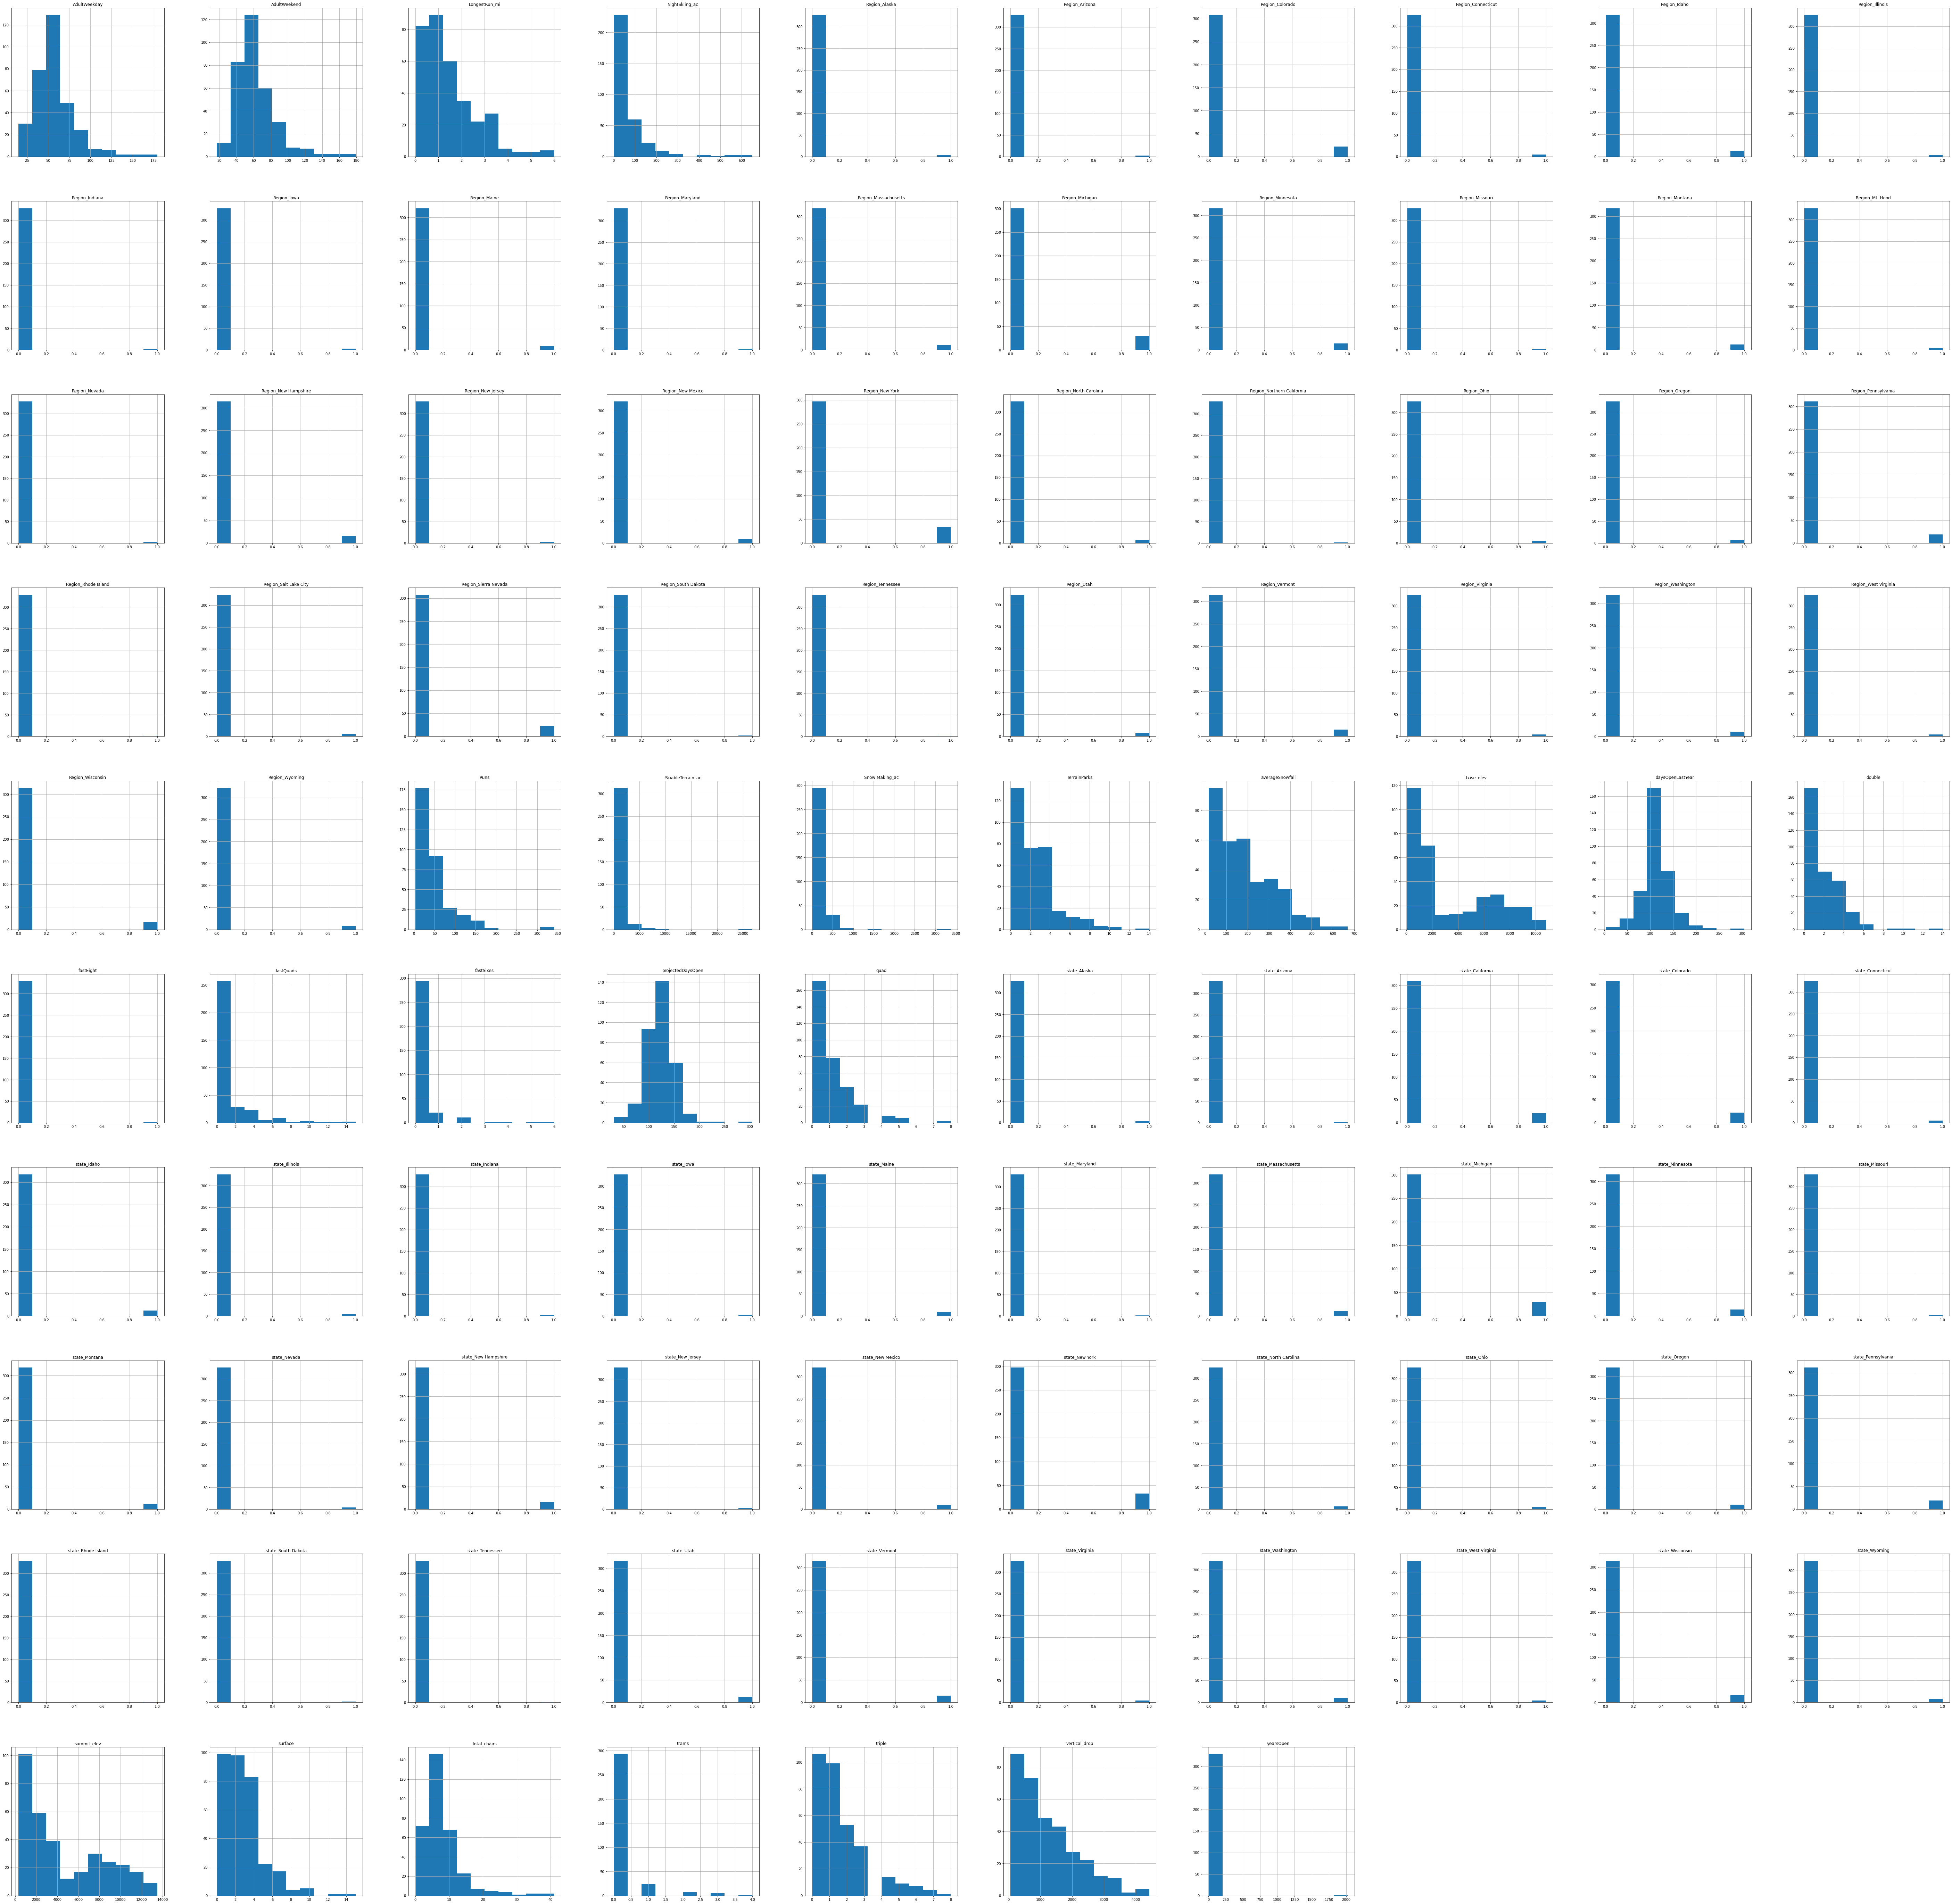

In [37]:
#histograms for each variable in df
hist = file.hist(bins=10,figsize=(100,100))